# Chapter: Dimension Reduction and Latent Variable Methods (Part 1)

# Topic: Kernal PCA

In [2]:
# import required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [3]:
# fetch data
data = pd.read_excel('KPCA_example.xlsx')
           
# scale data
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data)
           
# PCA
kpca = KernelPCA(kernel='rbf', gamma = 1)
score = kpca.fit_transform(data)

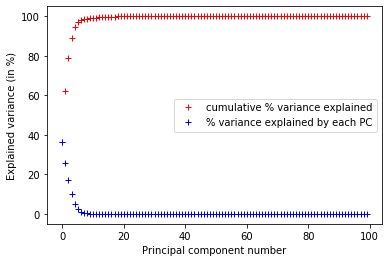

In [5]:
# visualize explained variance
import matplotlib.pyplot as plt

lambdas = kpca.lambdas_
explained_variance_ratio = lambdas/np.sum(lambdas)

explained_variance = 100*explained_variance_ratio # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

plt.figure()
plt.plot(cum_explained_variance, 'r+', label = 'cumulative % variance explained')
plt.plot(explained_variance, 'b+' , label = '% variance explained by each PC')
plt.ylabel('Explained variance (in %)')
plt.xlabel('Principal component number')
plt.legend()
plt.show()

In [6]:
# decide # of PCs to retain and compute reduced data in PC space
n_comp = np.argmax(cum_explained_variance >= 90) + 1
score_reduced = score[:,0:n_comp]

print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  5
